In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [70]:
df = pd.read_csv("../data/heart_disease_selected.csv")
df

,cp_4,oldpeak,thal_6,cp_3,thalach,trestbps,age,fbs_1,sex_1,slope_2,exang_1,slope_3,restecg_2,thal_7,restecg_1,cp_2,ca,chol,target
0,False,1.087338,True,False,0.017197,0.757525,0.948726,True,True,False,False,True,True,False,False,False,-0.711131,-0.264900,0
1,True,0.397182,False,False,-1.821905,1.611220,1.392002,False,True,True,True,False,True,False,False,False,2.504881,0.760415,1
2,True,1.346147,False,False,-0.902354,-0.665300,1.392002,False,True,True,True,False,True,True,False,False,1.432877,-0.342283,1
3,False,2.122573,False,True,1.637359,-0.096170,-1.932564,False,True,False,False,True,False,False,False,False,-0.711131,0.063974,0
4,False,0.310912,False,False,0.980537,-0.096170,-1.489288,False,False,False,False,False,True,False,False,True,-0.711131,-0.825922,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,0.138373,False,False,-0.770990,-1.234430,-1.046013,False,True,True,False,False,False,True,False,False,-0.711131,0.334813,1
299,True,2.036303,False,False,-0.376896,0.700612,1.502821,True,True,True,False,False,False,True,False,False,1.432877,-1.038723,1
300,True,0.138373,False,False,-1.515388,-0.096170,0.283813,False,True,True,True,False,False,True,False,False,0.360873,-2.238149,1
301,False,-0.896862,False,False,1.068113,-0.096170,0.283813,False,False,True,False,False,True,False,False,True,0.360873,-0.206864,1


In [71]:
X = df.drop(columns=["target"])
y = df["target"]

In [72]:
pca = PCA()
X_pca = pca.fit_transform(X)

# Explained variance per component
explained_var = pca.explained_variance_ratio_

# Cumulative variance
cum_var = np.cumsum(explained_var)


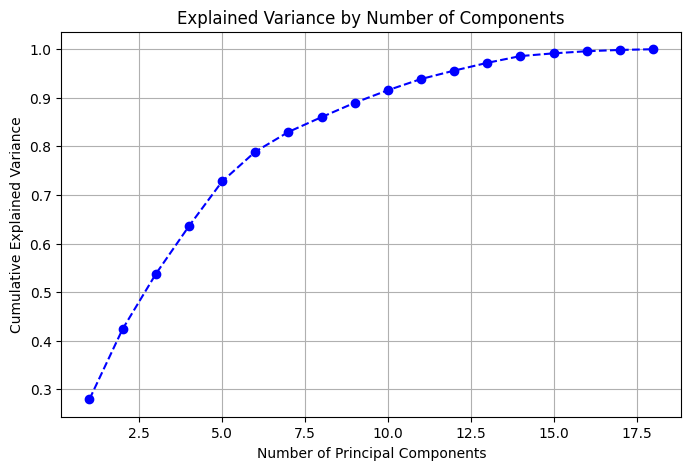

In [73]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cum_var)+1), cum_var, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.grid(True)
plt.show()

In [74]:
n_components_optimal = np.argmax(cum_var >= 0.90) + 1
pca_final = PCA(n_components=n_components_optimal)
X_pca_final = pca_final.fit_transform(X)

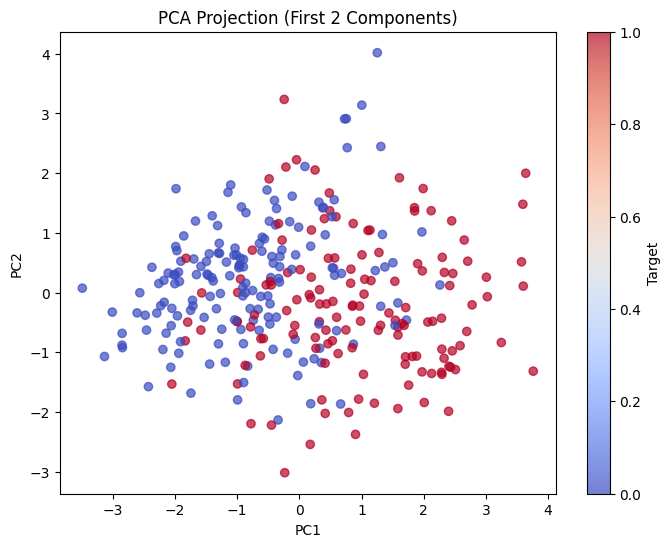

In [75]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca_final[:,0], X_pca_final[:,1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection (First 2 Components)")
plt.colorbar(label="Target")
plt.show()

In [76]:
pca_cols = [f"PC{i+1}" for i in range(X_pca_final.shape[1])]
df_pca = pd.DataFrame(X_pca_final, columns=pca_cols)
df_pca["target"] = y.values

df_pca.to_csv("../data/heart_disease_pca.csv", index=False)